In [8]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../code/")
from structure import *
from algo import *
from basic import *
from analysis import *
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
update_name = APP_NAME_OBSERVED
update_name[2] = 'Washing \nMachine'

In [3]:
year = 2015

mean_consumption = {}
for year in [2015, 2016]:
    tensor, hid = get_tensor(year, 'observed')
    mean_consumption[year] = {}
    for idx, appliance in enumerate(update_name):
        mean_consumption[year][appliance] = tensor[:, idx, :].mean(axis=0)

In [4]:
df = pd.DataFrame(mean_consumption[2015])
df.rename(index={0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'})

,Aggregate,Dishwasher,Fridge,Furnace,HVAC,Microwave,Washing Machine
Jan,921.061678,15.531612,68.949574,147.759694,34.663342,10.212596,5.373834
Feb,877.351116,15.286456,70.004557,127.861001,36.591914,9.565831,5.215324
Mar,852.111608,13.816941,73.123477,100.338137,53.853239,9.384995,5.467483
Apr,993.489207,13.907577,81.838941,103.448178,183.784725,8.529827,5.447905
May,1198.298891,13.764671,84.127457,149.076349,324.358618,8.442541,5.431255
Jun,1658.086163,13.772743,86.188666,232.216914,682.042716,7.795286,5.272315
Jul,1997.503530,12.190739,87.643090,284.651081,959.535802,7.211026,4.694212
Aug,2160.187910,12.459786,88.316321,300.106973,1054.724106,7.480907,4.432297
Sep,1800.101951,13.144837,87.859078,248.987811,777.058593,7.657830,4.463392
Oct,1289.969880,13.079224,85.160369,160.524122,394.811554,8.156187,4.372232


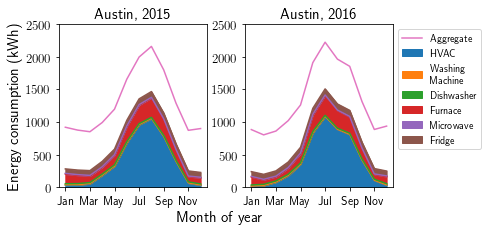

In [20]:
# from plot_functions import format_axes, latexify

# latexify(columns=1)


fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
for col, year in enumerate([2015, 2016]):
    df = pd.DataFrame(mean_consumption[year])
    df = df.rename(columns=name_dict)
    df = df.rename(index={0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'})
    
    (df)[APP_NAME_OBSERVED[1:]].plot(kind='area', stacked=True, ax=ax[col], legend=False)
    df['Aggregate'].plot(ax=ax[col], legend=False)
ax[0].set_title("Austin, 2015", fontsize=15)
ax[1].set_title("Austin, 2016", fontsize=15)
ax[0].set_ylim((0, 2500))    
ax[1].set_ylim((0, 2500))
ind = [ 0, 2, 4,6, 8, 10]
month = ['Jan', 'Mar', 'May', 'Jul',  'Sep','Nov', 'Dec']
ax[0].tick_params(labelsize=13)
ax[1].tick_params(labelsize=13)

ax[0].set_xticks(ind)
ax[0].set_xticklabels(month, fontsize=12)
ax[1].set_xticks(ind)
ax[1].set_xticklabels(month, fontsize=12)

plt.subplots_adjust(wspace=0.25)

l = plt.legend(bbox_to_anchor=(1, 1))
t = fig.text(0.4, -0.03, "Month of year", fontsize=15)
q = ax[0].set_ylabel("Energy consumption (kWh)", fontsize=15)
plt.savefig("../figure/region-energy.pdf", bbox_inches="tight", bbox_extra_artists=[l, t, q])
# plt.savefig("../../KDD2019-ActiveSensing-Jia/figure/region-energy.pdf", bbox_inches="tight", bbox_extra_artists=[l, t, q])


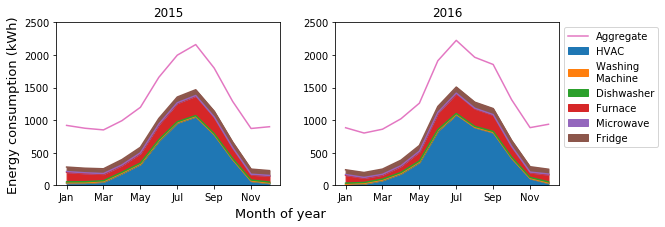

In [11]:
from plot_functions import format_axes, latexify

# latexify(columns=1)


fig, ax = plt.subplots(ncols=2, figsize=(9, 3))
for col, year in enumerate([2015, 2016]):
    df = pd.DataFrame(mean_consumption[year])
    df = df.rename(columns=name_dict)
    df = df.rename(index={0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'})
    
    (df)[APP_NAME_OBSERVED[1:]].plot(kind='area', stacked=True, ax=ax[col], legend=False)
    df['Aggregate'].plot(ax=ax[col], title="{}".format(year), legend=False)
ax[0].set_ylim((0, 2500))    
ax[1].set_ylim((0, 2500))
ind = [ 0, 2, 4,6, 8, 10]
month = ['Jan', 'Mar', 'May', 'Jul',  'Sep','Nov', 'Dec']

ax[0].set_xticks(ind)
ax[0].set_xticklabels(month)
ax[1].set_xticks(ind)
ax[1].set_xticklabels(month)

plt.subplots_adjust(wspace=0.25)

l = plt.legend(bbox_to_anchor=(1, 1))
t = fig.text(0.4, -0.02, "Month of year", fontsize=13)
q = ax[0].set_ylabel("Energy consumption (kWh)", fontsize=13)
plt.savefig("../figure/region-energy_wide.pdf", bbox_inches="tight", bbox_extra_artists=[l, t, q])
# plt.savefig("../../KDD2019-ActiveSensing-Jia/figure/region-energy.pdf", bbox_inches="tight", bbox_extra_artists=[l, t, q])
